Utilizing a Kaggle online retail dataset to estimate the monthly revenue.

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/OnlineRetail.csv", encoding = "ISO-8859-1")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


It appears that there are orders with negative quantities as well as negative prices. I am assuming that these are returns/refunds. If we simply remove all orders with negative values, then it will bias the dataset. Let's see how many negative values are present in the dataset.

In [6]:
df[ (df.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


10.6k rows is approximately 2% of the total data. Additionally, there do not appear to be exact counterparts to the negative quantities, making it hard to delete the corresponding orders. 

Since the metric we are calculating from this dataset is the monthly revenue, we can simply ignore the orders since they will subtract out from the order total.

In [7]:
df[df.Description == 'Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


There are only three orders with stock code 'B', two of which have negative price. Removing all 3 orders.

In [8]:
df = df.drop([299982, 299983, 299984]).reset_index(drop=True)

Estimating monthly revenue

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['OrderTotal'] = df['Quantity'] * df['UnitPrice']

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [60]:
df['MonthYear'] = df['InvoiceDate'].apply(lambda x: x.year*100+x.month)

In [12]:
revenue_df = df.groupby('MonthYear')['OrderTotal'].sum().reset_index()

In [13]:
revenue_df

,MonthYear,OrderTotal
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,693742.570
9,201109,1019687.622


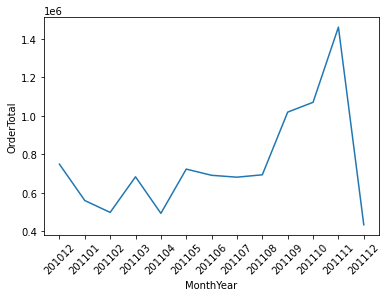

In [14]:
sns.lineplot(data=revenue_df, x='MonthYear', y='OrderTotal')
plt.xticks(rotation=45);

Dropping December, since it's incomplete

In [15]:
revenue_df = revenue_df[:-1].copy()

Figuring out the monthly growth rate

In [16]:
revenue_df['GrowthRate'] = revenue_df['OrderTotal'].pct_change()

In [17]:
revenue_df.head()

,MonthYear,OrderTotal,GrowthRate
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


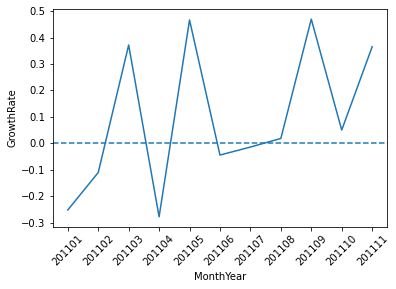

In [18]:
sns.lineplot(data=revenue_df, x='MonthYear', y='GrowthRate')
plt.axhline(y=0, ls='--')
plt.xticks(rotation=45);

## Monthly Active Customers in UK

In [61]:
uk_df = df.query("Country=='United Kingdom'")
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderTotal,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012


Looking into monthly activity by looking at number of active customer IDs

In [29]:
#creating monthly active customers dataframe by counting unique Customer IDs
uk_monthly_active = uk_df.groupby('MonthYear')['CustomerID'].nunique().reset_index()

In [32]:
uk_monthly_active

,MonthYear,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


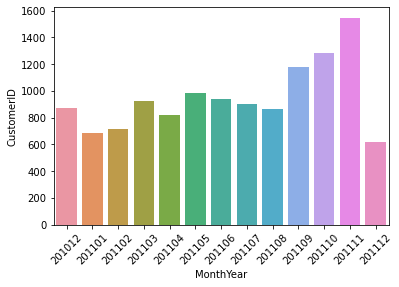

In [34]:
sns.barplot(data=uk_monthly_active, x='MonthYear', y='CustomerID')
plt.xticks(rotation=45);

Lets also look at the monthly activity by way of the number of orders

In [38]:
#creating monthly active customers dataframe by counting unique Customer IDs
uk_monthly_sales = uk_df.groupby('MonthYear')['Quantity'].sum().reset_index()

In [39]:
uk_monthly_sales

,MonthYear,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319801
9,201109,458490


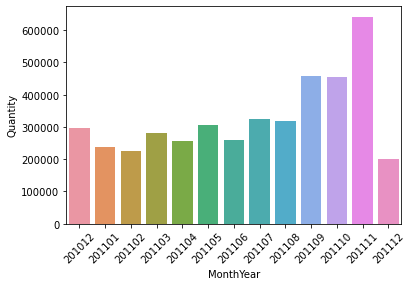

In [40]:
sns.barplot(data=uk_monthly_sales, x='MonthYear', y='Quantity')
plt.xticks(rotation=45);

We notice the same general trend for both activity indicators. Overall there is a rise of customer activity from June onwards, both of number of sales and customers accessing the application

## Average monthly sales

In [43]:
uk_avg_monthly_revenue = uk_df.groupby('MonthYear')['OrderTotal'].mean().reset_index()
uk_avg_monthly_revenue

,MonthYear,OrderTotal
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.672895
9,201109,18.931723


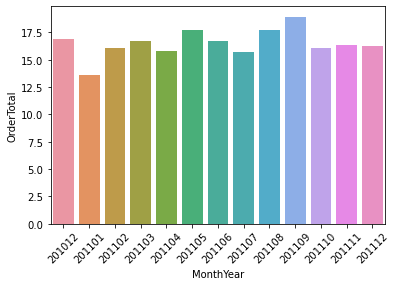

In [45]:
sns.barplot(data=uk_avg_monthly_revenue, x='MonthYear', y='OrderTotal')
plt.xticks(rotation=45);

Not surprisingly, due to the increase in both number of customers and overall sales, the average sales per month remained consistent month-to-month. This suggests that on average customers tend to spend approximately similar amounts.

Exploring two more metrics. Namely:
- New customer Ratio

First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.

- Retention Rate

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

In [62]:
uk_first_purchase = uk_df.groupby('CustomerID')['InvoiceDate'].first().reset_index()
uk_first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']
uk_first_purchase['FirstPurchaseYearMonth'] = uk_first_purchase['FirstPurchaseDate'].apply(lambda x: x.year*100 + x.month)

In [63]:
# merge this dataframe with the UK dataframe
uk_df = uk_df.merge(uk_first_purchase, on='CustomerID')

In [64]:
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderTotal,MonthYear,FirstPurchaseDate,FirstPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012


In [65]:
uk_df['UserType'] = 'New'
uk_df.loc[uk_df['MonthYear'] > uk_df['FirstPurchaseYearMonth'], 'UserType'] = 'Existing'

Calculating revenue per month for each user type

In [66]:
uk_monthlyrevenue_peruser = uk_df.groupby(['MonthYear', 'UserType'])['OrderTotal'].sum().reset_index()

In [67]:
uk_monthlyrevenue_peruser

,MonthYear,UserType,OrderTotal
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


In [71]:
uk_monthlyrevenue_peruser = uk_monthlyrevenue_peruser[(uk_monthlyrevenue_peruser['MonthYear']!=201012) & (uk_monthlyrevenue_peruser['MonthYear']!=201112)]

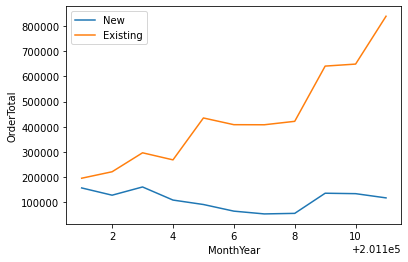

In [76]:
sns.lineplot(data=uk_monthlyrevenue_peruser.query("UserType=='New'"), x='MonthYear', y='OrderTotal', label=
            'New')
sns.lineplot(data=uk_monthlyrevenue_peruser.query("UserType=='Existing'"), x='MonthYear', y='OrderTotal', label=
            'Existing')
plt.legend()

From the plot above, it is clear that existing customers are the ones growing the business, while new customer orders are remaining steady with a minor decline.

Let's also calculate the monthly new customer ratio

In [81]:
uk_new_customer_ratio = (uk_df.query("UserType=='New'").groupby('MonthYear')['CustomerID'].nunique() / uk_df.query("UserType=='Existing'").groupby('MonthYear')['CustomerID'].nunique()).reset_index()
uk_new_customer_ratio

,MonthYear,CustomerID
0,201012,NaN
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878


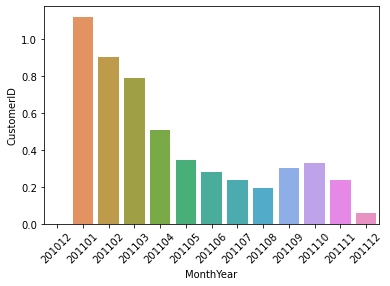

In [82]:
sns.barplot(data=uk_new_customer_ratio, x='MonthYear', y='CustomerID')
plt.xticks(rotation=45);

As expected, there has been a decline in new customers added to application since the beginning of the dataset

## Monthly retention rate

In [83]:
uk_user_purchase = uk_df.groupby(['CustomerID', 'MonthYear'])['OrderTotal'].sum().reset_index()

In [104]:
uk_retention = pd.crosstab(uk_user_purchase['CustomerID'], uk_user_purchase['MonthYear']).reset_index()

In [90]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = uk_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = uk_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = uk_retention[(uk_retention[selected_month]>0) & (uk_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
uk_retention_new = pd.DataFrame(retention_array)
uk_retention_new['RetentionRate'] = uk_retention_new['RetainedUserCount']/uk_retention_new['TotalUserCount']

In [92]:
uk_retention_new['YearMonth'] = uk_retention_new['YearMonth'].astype(str)

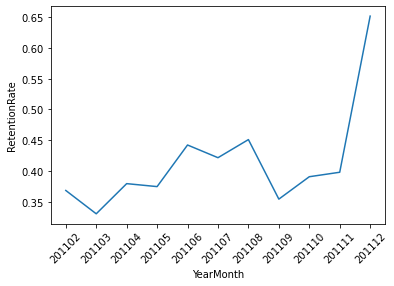

In [94]:
sns.lineplot(data=uk_retention_new, x='YearMonth', y='RetentionRate')
plt.xticks(rotation=45);

## Cohort-based retention rate

In [105]:
#add first purchase year month to uk retention table
uk_retention = pd.merge(uk_retention,uk_first_purchase[['CustomerID','FirstPurchaseYearMonth']],on='CustomerID')
uk_retention

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,FirstPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [106]:
new_column_names = [ 'm_' + str(column) for column in uk_retention.columns[:-1]]
new_column_names.append('FirstPurchaseYearMonth')
uk_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = uk_retention[uk_retention.FirstPurchaseYearMonth == selected_month].FirstPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "FirstPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(uk_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
uk_retention = pd.DataFrame(retention_array)
uk_retention.index = months

#showing new cohort based retention table
uk_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
MonthYear,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
